# Data exploration

This notebook is used to explore the data and to get a better understanding of the data.

### Firstly we will visualize the kind of data we have. 
### We will use the [Pandas](https://pandas.pydata.org/) library and [matplotlib](https://matplotlib.org/) to visualize the data.

In [1]:
# Importing libraries

from imblearn.over_sampling import SMOTE
from skimage import io
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
import os


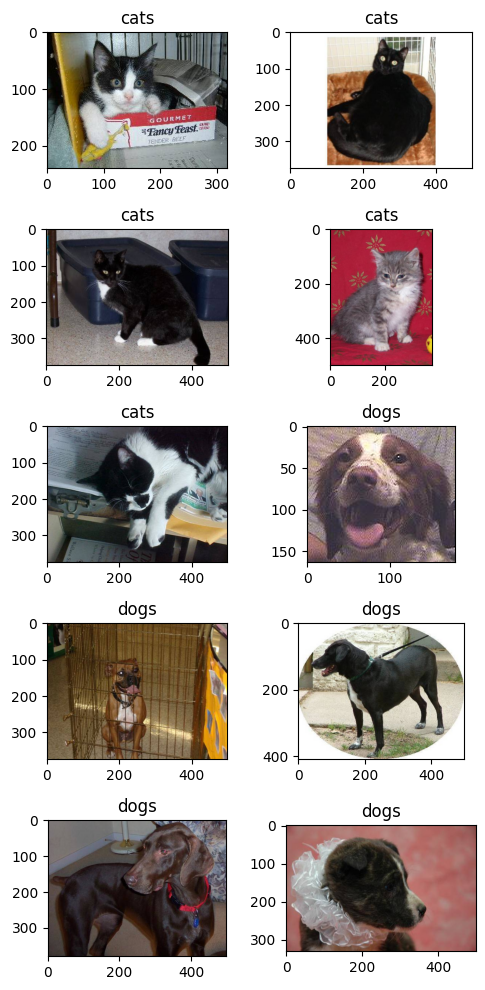

In [2]:
# Define paths to training and test sets
classes = ["cats", "dogs"]
data_dir = "../dataset"
train_dir = os.path.join(data_dir, "training_set")
test_dir = os.path.join(data_dir, "test_set")

# Display sample images
num_samples = 5
plt.figure(figsize=(num_samples, 10), tight_layout=True)
for i, class_name in enumerate(classes):
    class_path = os.path.join(train_dir, class_name)
    random_samples = random.sample(os.listdir(class_path), num_samples)
    for j, sample in enumerate(random_samples):
        img = plt.imread(os.path.join(class_path, sample))
        plt.subplot(num_samples, len(classes), i * num_samples + j + 1)
        plt.imshow(img)
        plt.title(class_name)
plt.tight_layout()
plt.show()


### The training data is split into training and validation data. We will visualize the class distribution.

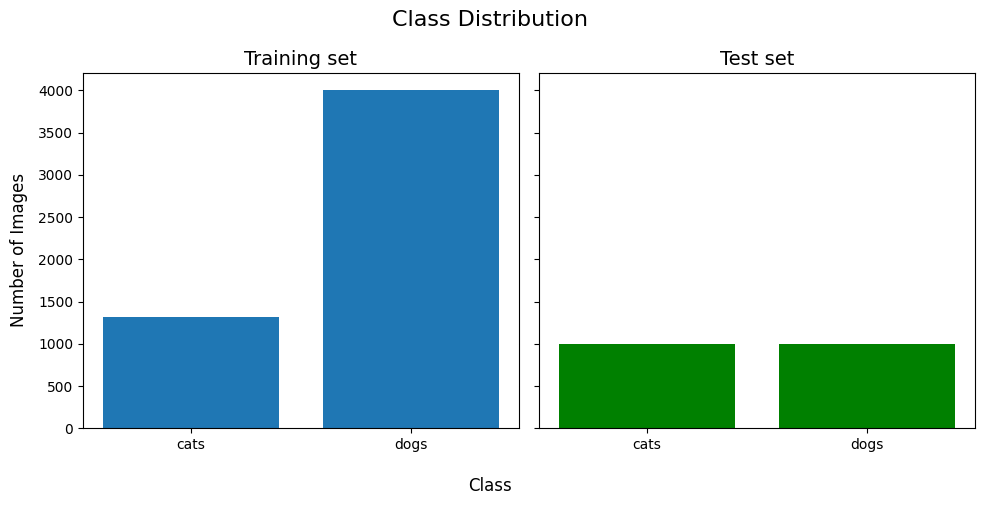

In [3]:
# Count the number of images in each class in the training set
class_counts_train = {}
for class_name in classes:
    class_path = os.path.join(train_dir, class_name)
    num_images = len(os.listdir(class_path))
    class_counts_train[class_name] = num_images

# Count the number of images in each class in the test set
class_counts_test = {}
for class_name in classes:
    class_path = os.path.join(test_dir, class_name)
    num_images = len(os.listdir(class_path))
    class_counts_test[class_name] = num_images


# Visualize class distribution for training set
fig, axs = plt.subplots(1, 2, figsize=(10, 5), sharex=True, sharey=True, tight_layout=True)
fig.suptitle("Class Distribution", fontsize=16)
fig.supxlabel("Class", fontsize=12)
fig.supylabel("Number of Images", fontsize=12)
axs[0].bar(class_counts_train.keys(), class_counts_train.values())
axs[0].set_title("Training set", fontsize=14)
axs[1].bar(class_counts_test.keys(), class_counts_test.values(), color="green")
axs[1].set_title("Test set", fontsize=14)
plt.show()    


We discovered that the data is imbalanced. In the next notebook we will try to balance the data while training the model.